# UNGRADED Workbook for In-Class

This notebook is here for you to "code along" during class. 

It will not be graded, so feel free to play around!

In [1]:
import numpy as np
import bqplot

In [3]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-wde3bqt4 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [23]:
x = np.random.random(size=32**3)
y = np.random.random(size=32**3)

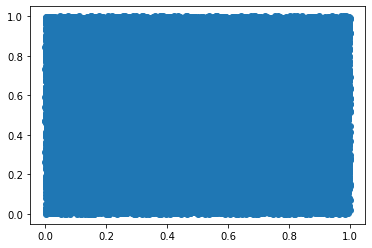

In [24]:
plt.scatter(x, y)

In [28]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical')

scatter = bqplot.Scatter(x=x, y=y, scales = {'x': x_sc, 'y': y_sc}, alpha = 0.1)

figure = bqplot.Figure(marks = [], axes = [x_ax, y_ax])
display(figure)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [29]:
import traitlets
import ipywidgets

In [30]:
class MyDashboard(traitlets.HasTraits):
    x_axis = traitlets.Unicode()
    y_axis = traitlets.Unicode()

In [31]:
db1 = MyDashboard(x_axis = "Time", y_axis = "Sunlight")

In [32]:
db1.x_axis

'Time'

In [106]:
class MultiViewDashboard(traitlets.HasTraits):
    left_view = traitlets.Instance(klass=bqplot.Figure)
    right_view = traitlets.Instance(klass=bqplot.Figure)
    view = traitlets.Instance(klass=ipywidgets.Box)
    dataset = traitlets.Instance(klass=np.ndarray)
    left_y_axis = traitlets.CInt()
    right_y_axis = traitlets.CInt()
    ui_bar = traitlets.Instance(klass=ipywidgets.Box)
    
    @traitlets.observe("left_y_axis")
    def _update_left_y_axis(self, change):
        self.left_view.marks[0].y = self.dataset[:, change['new']]

    @traitlets.default("dataset")
    def _default_dataset(self):
        x = np.mgrid[0.0:12.0:256j]
        y1 = np.sin(x**2)
        y2 = np.cos(x*1.5)
        y3 = np.tan(x/2)
        return np.stack([x, y1, y2, y3], axis=-1)

    @traitlets.default("ui_bar")
    def _default_ui_bar(self):
        color = ipywidgets.ColorPicker()
        x_range = ipywidgets.FloatRangeSlider(min = 0, max = 12.0)
        x_range.value = (0, 12)
        def change_x_range(change):
            mi, ma = change['new']
            self.left_view.marks[0].scales['x'].min = mi
            self.left_view.marks[0].scales['x'].max = ma
        x_range.observe(change_x_range, 'value')
        def change_line_color(change):
            self.left_view.marks[0].colors = [change['new']]
        color.observe(change_line_color, ['value'])
        
        left_axis_select = ipywidgets.Dropdown(
            options = [("sin(x**2)", 1), ("cos(3x/2)", 2), ("tan(x/2)", 3)],
            value = 1
        )
        traitlets.link( (left_axis_select, "value"), (self, "left_y_axis") )
        
        return ipywidgets.HBox([color, x_range, left_axis_select])
    
    @traitlets.default("left_view")
    def _default_left_view(self):
        x_sc = bqplot.LinearScale()
        y_sc = bqplot.LinearScale()
        x_ax = bqplot.Axis(scale = x_sc)
        y_ax = bqplot.Axis(scale = y_sc, orientation='vertical')
        line = bqplot.Lines(x = self.dataset[:,0], y = self.dataset[:,self.left_y_axis],
                            scales = {'x': x_sc, 'y': y_sc})
        return bqplot.Figure(marks = [line], axes=[x_ax, y_ax])
    
    @traitlets.default("right_view")
    def _default_right_view(self):
        return bqplot.Figure()
    
    @traitlets.default("view")
    def _default_view(self):
        return ipywidgets.VBox([
                    self.ui_bar,
                    ipywidgets.HBox([self.left_view, self.right_view])
        ])

In [107]:
mdb = MultiViewDashboard()

In [108]:
mdb.view

In [113]:
mdb.left_y_axis = 3

In [87]:
mdb.left_view.marks[0].colors = ["#000000"]

In [91]:
mdb.view